In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('car_price_prediction.csv')
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


## Explore Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
data.describe().round(2)

,ID,Price,Prod. year,Cylinders,Airbags
count,19237.00,19237.00,19237.00,19237.00,19237.00
mean,45576535.89,18555.93,2010.91,4.58,6.58
std,936591.42,190581.27,5.67,1.20,4.32
min,20746880.00,1.00,1939.00,1.00,0.00
25%,45698374.00,5331.00,2009.00,4.00,4.00
50%,45772308.00,13172.00,2012.00,4.00,6.00
75%,45802036.00,22075.00,2015.00,4.00,12.00
max,45816654.00,26307500.00,2020.00,16.00,16.00


In [5]:
data.duplicated().sum()

np.int64(313)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.shape

(18924, 18)

In [9]:
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

## Data Analysis 

In [10]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [11]:
for col in data.columns:
    print(col)
    print(data[col].nunique())
    print(data[col].unique())
    print('\n','-'*100,'\n')

ID
18924
[45654403 44731507 45774419 ... 45804997 45793526 45813273]

 ---------------------------------------------------------------------------------------------------- 

Price
2315
[13328 16621  8467 ... 56814 63886 22075]

 ---------------------------------------------------------------------------------------------------- 

Levy
559
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598

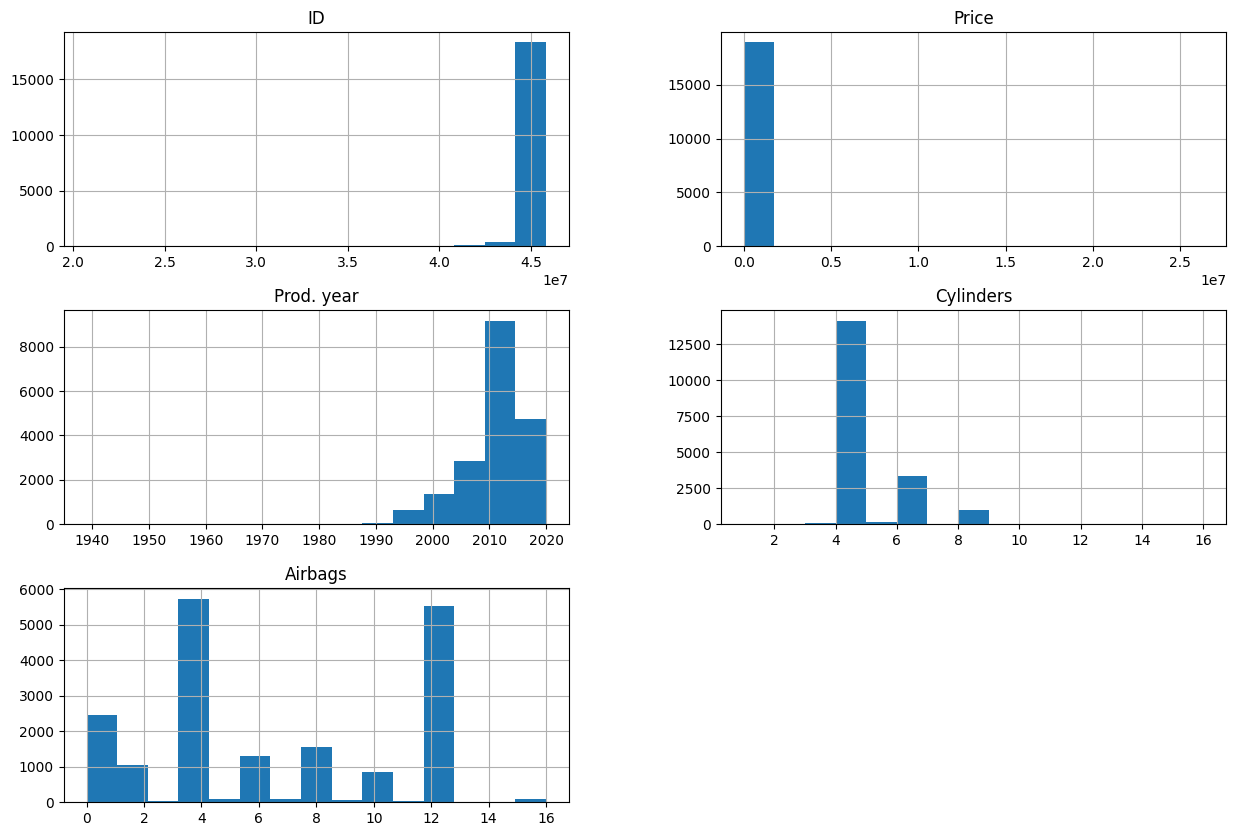

In [12]:
# بيرسم histplot لكل الاعمده الرقميه 
data.hist(bins=15,figsize=(15,10))
plt.show()

In [13]:
top10cars=data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

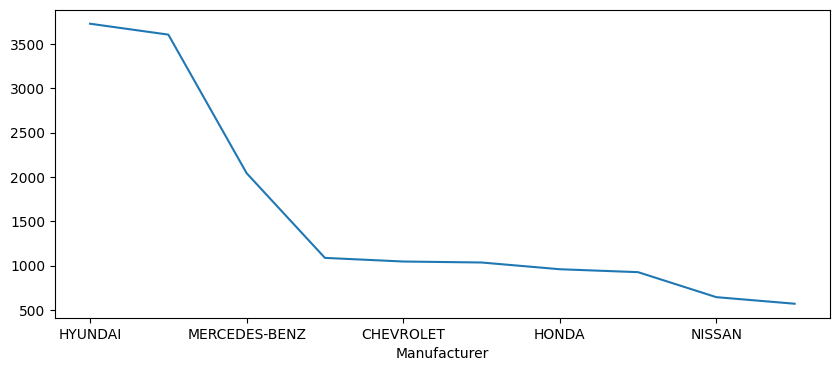

In [14]:
top10cars.plot(figsize=(10,4))
plt.show()

In [15]:
top10meanprices = [data[data['Manufacturer'] == i]['Price'].mean() for i in list(top10cars.index)]
top10meanprices

[np.float64(22306.00080450523),
 np.float64(14302.447864669994),
 np.float64(18590.331375428294),
 np.float64(15411.85018382353),
 np.float64(14894.873925501433),
 np.float64(20609.468146718147),
 np.float64(14162.073958333332),
 np.float64(20052.594390507013),
 np.float64(9835.84031007752),
 np.float64(11471.77408056042)]

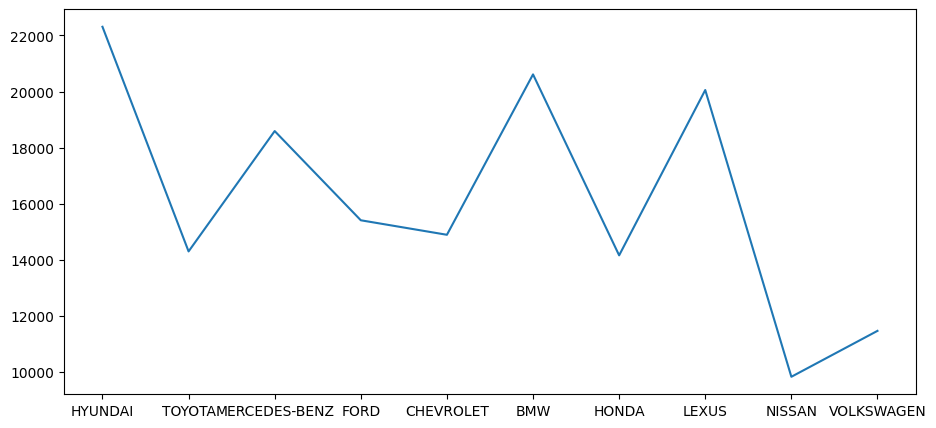

In [16]:
plt.figure(figsize=(11,5))   # تحدد حجم الشكل الأول
plt.plot(top10cars.index, top10meanprices)
plt.show()


In [17]:
cor=data.select_dtypes(include='number').corr()

In [18]:
cor

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


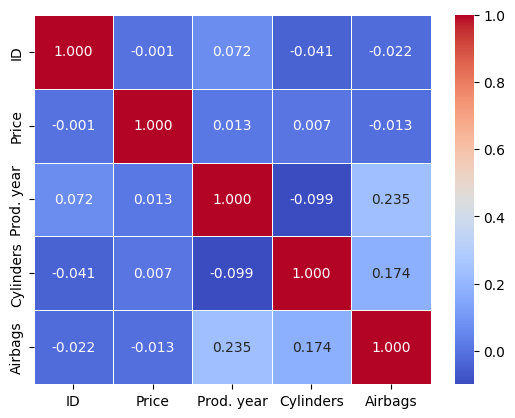

In [19]:
sns.heatmap(cor,annot=True,linewidth='.5',fmt='.3f',cmap='coolwarm')
plt.show()

In [20]:
data_obj=data.select_dtypes(include='O').columns
data_obj

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

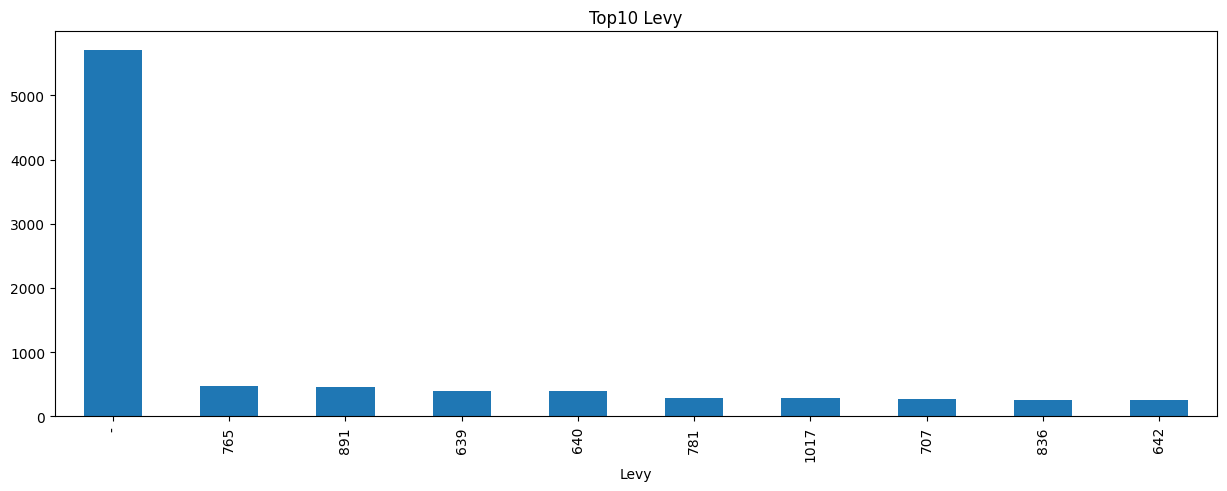

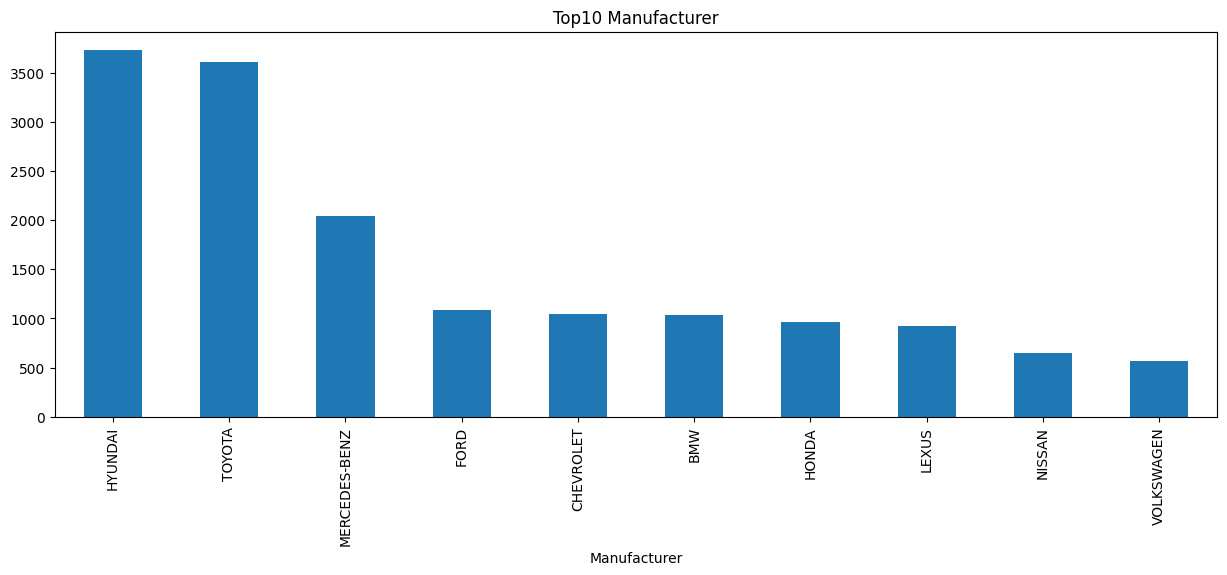

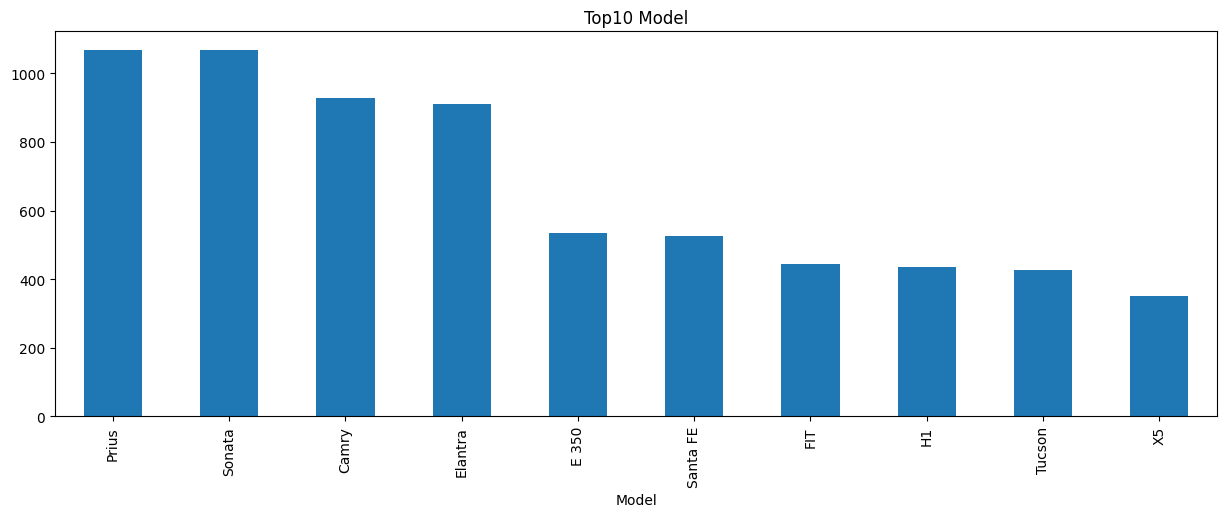

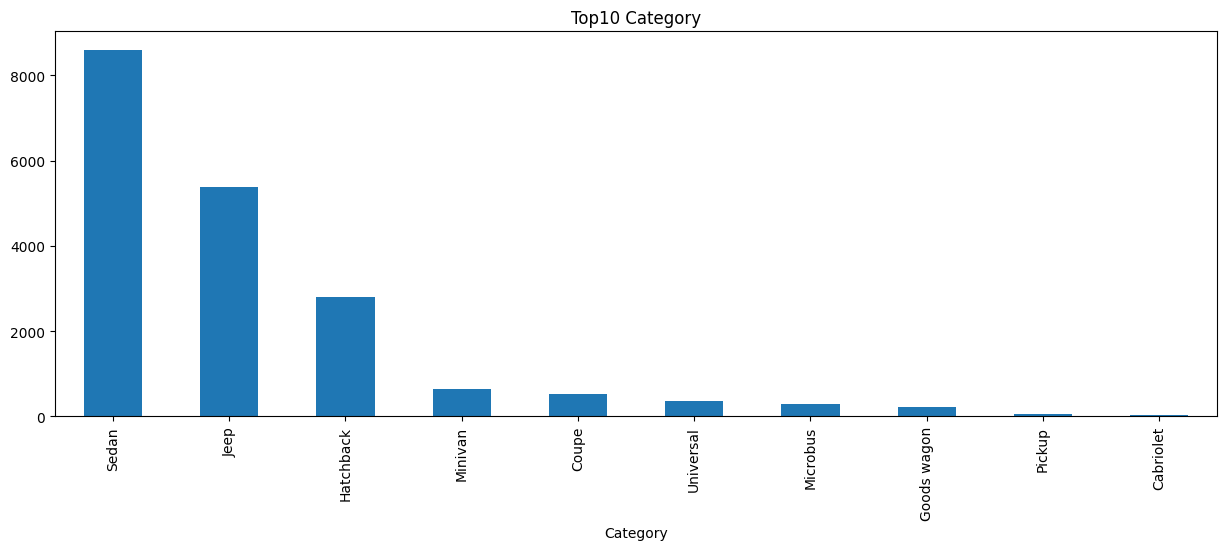

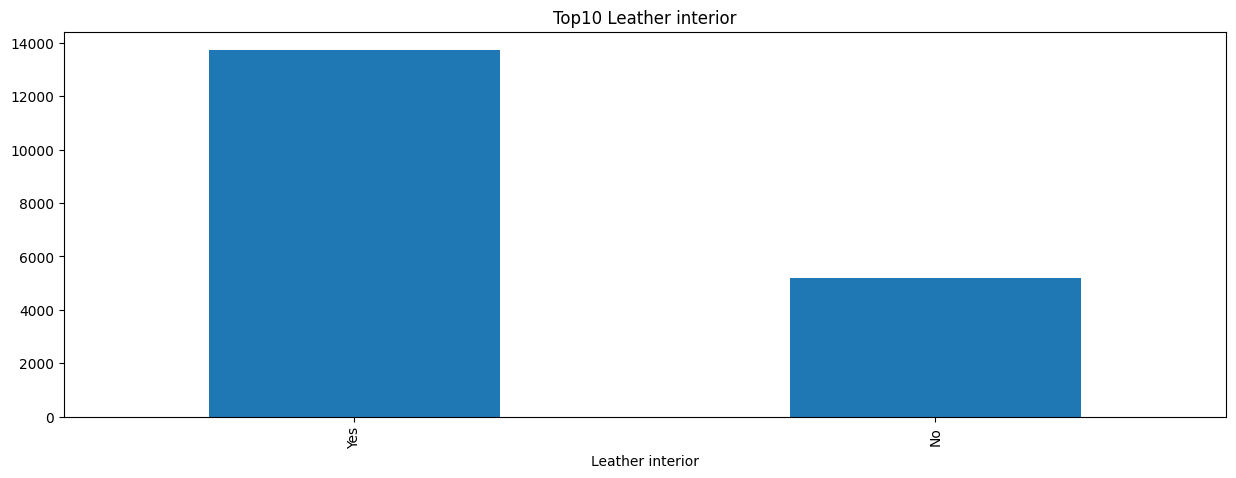

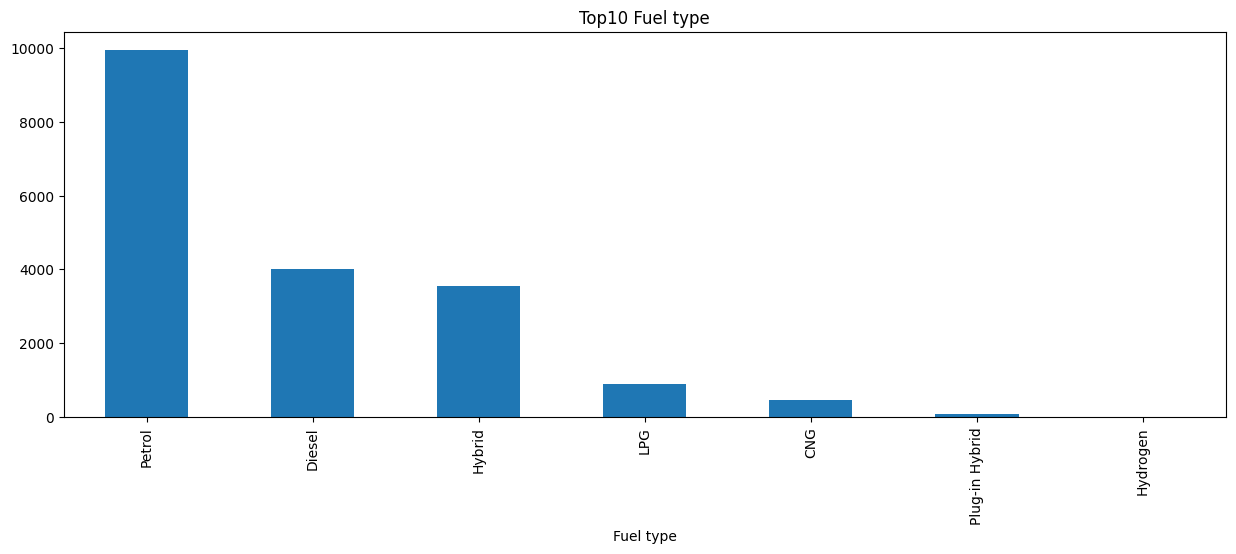

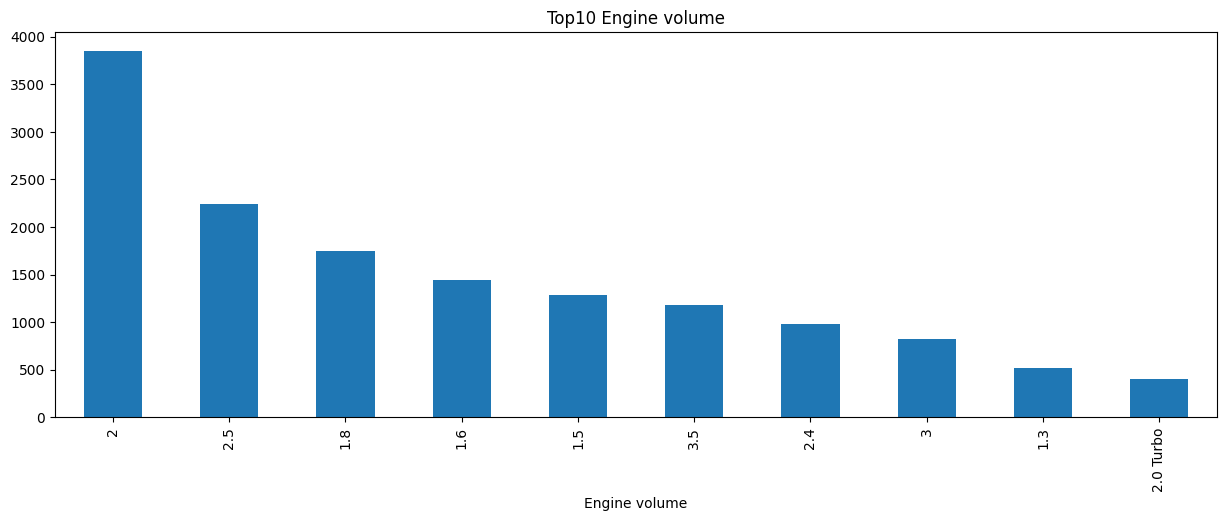

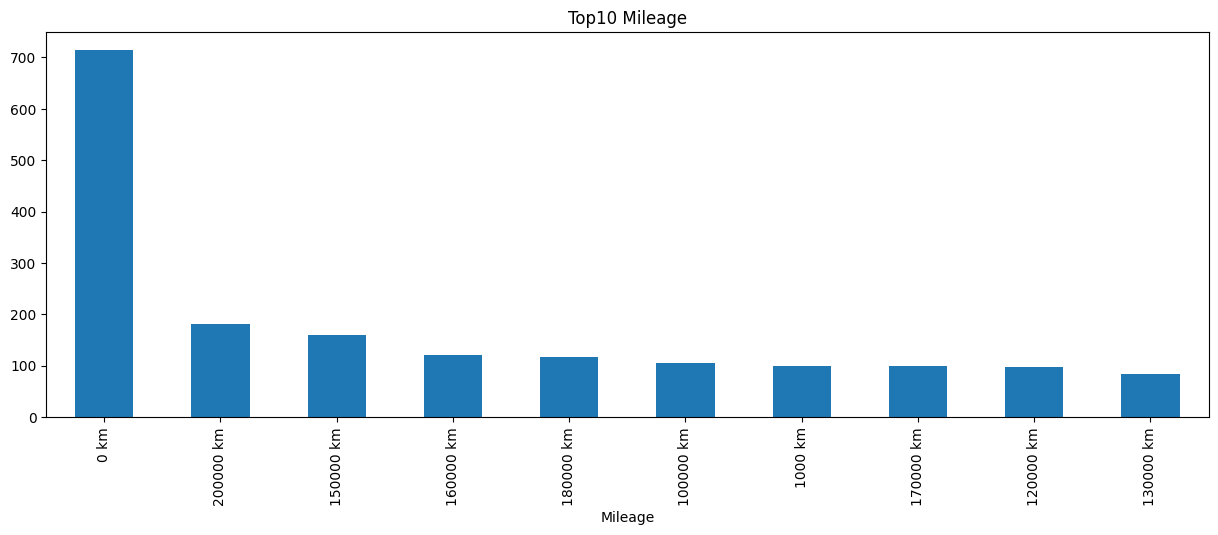

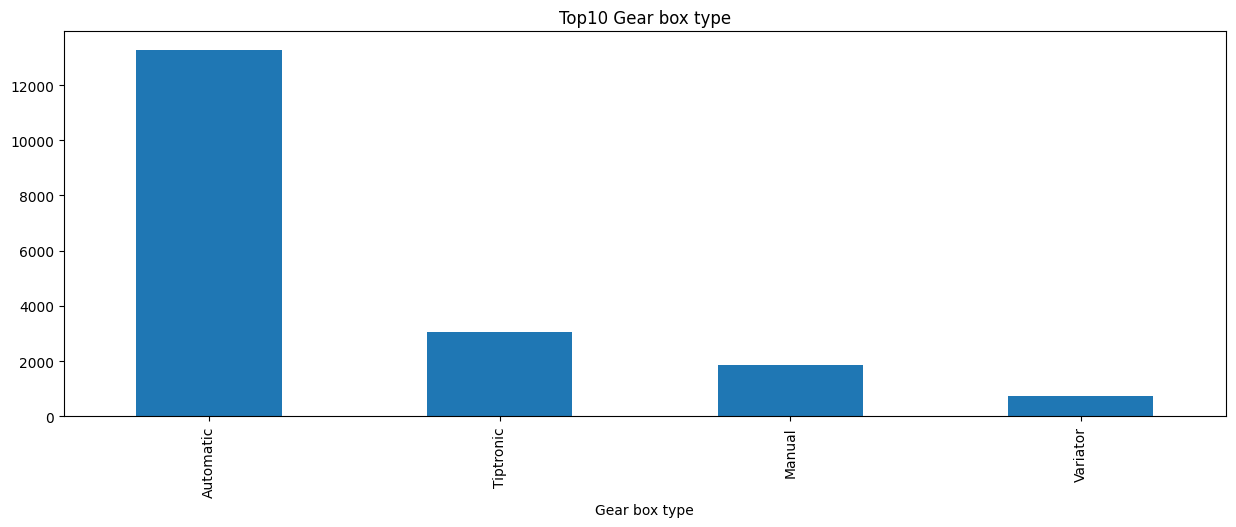

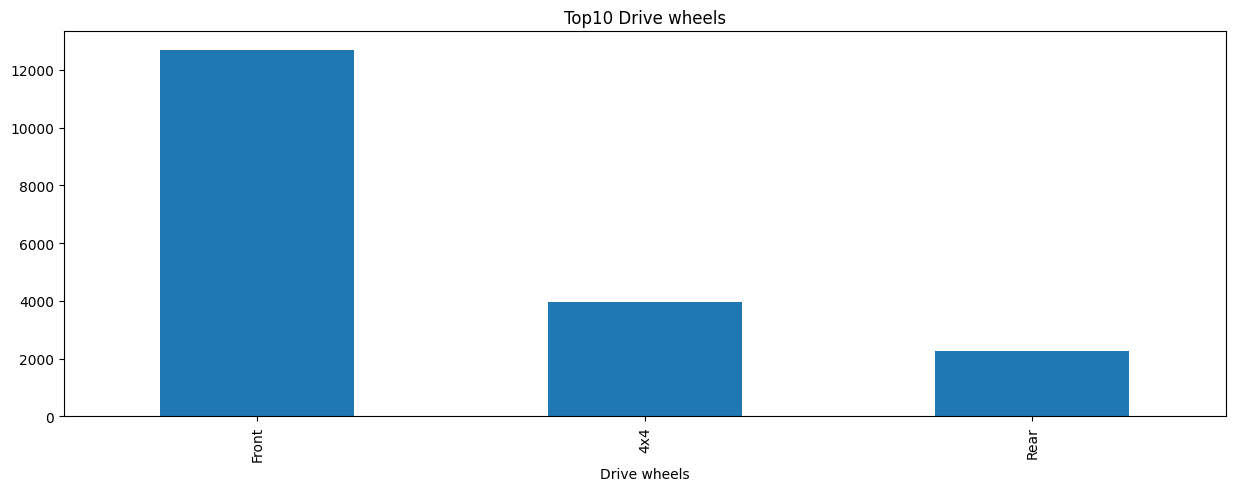

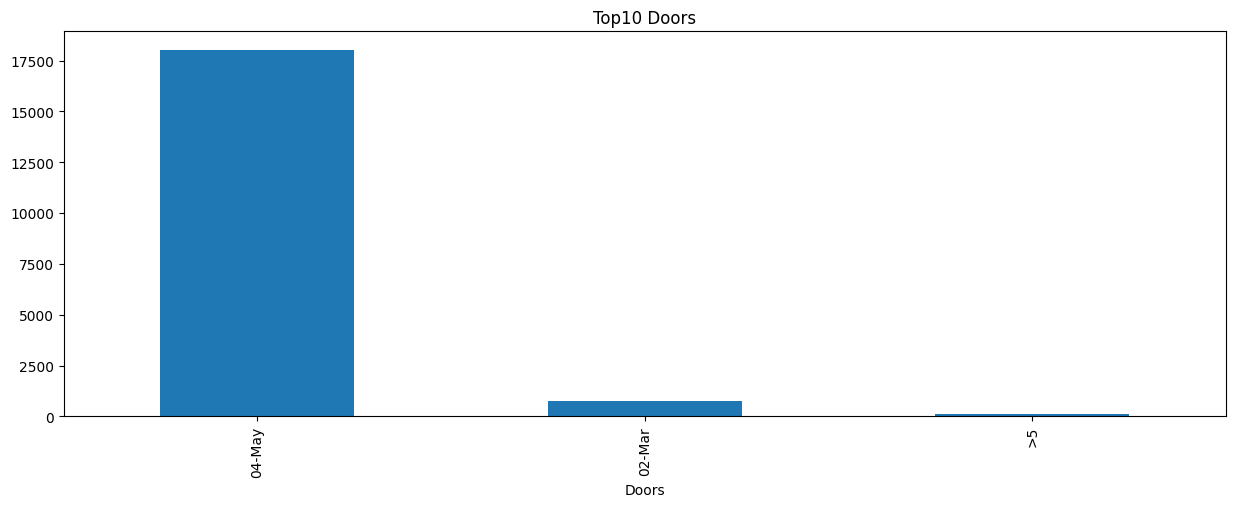

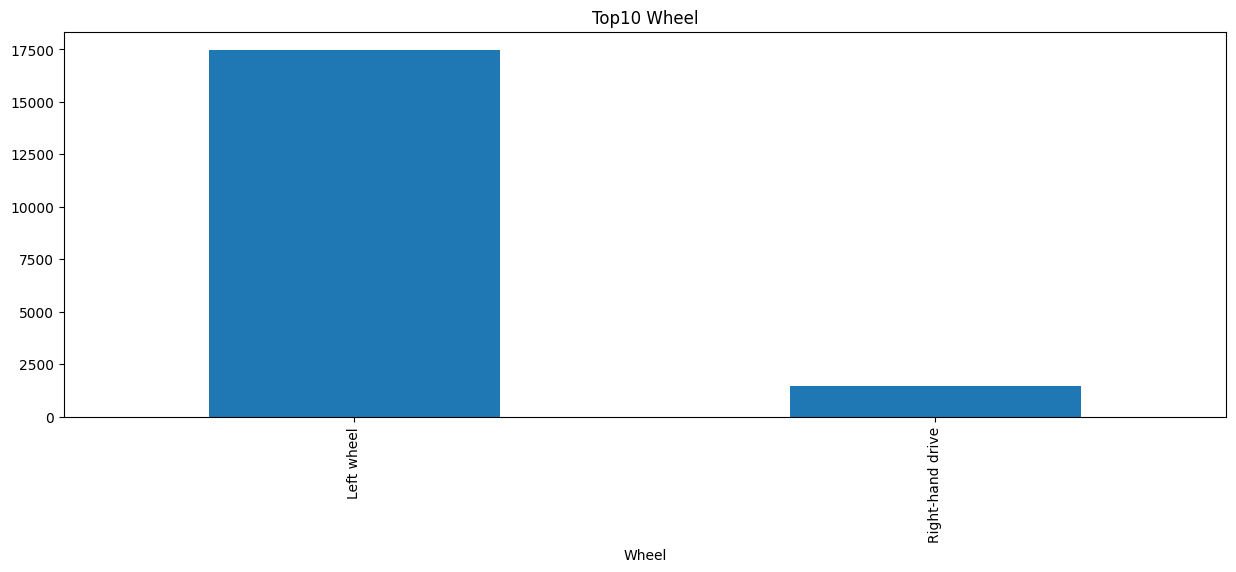

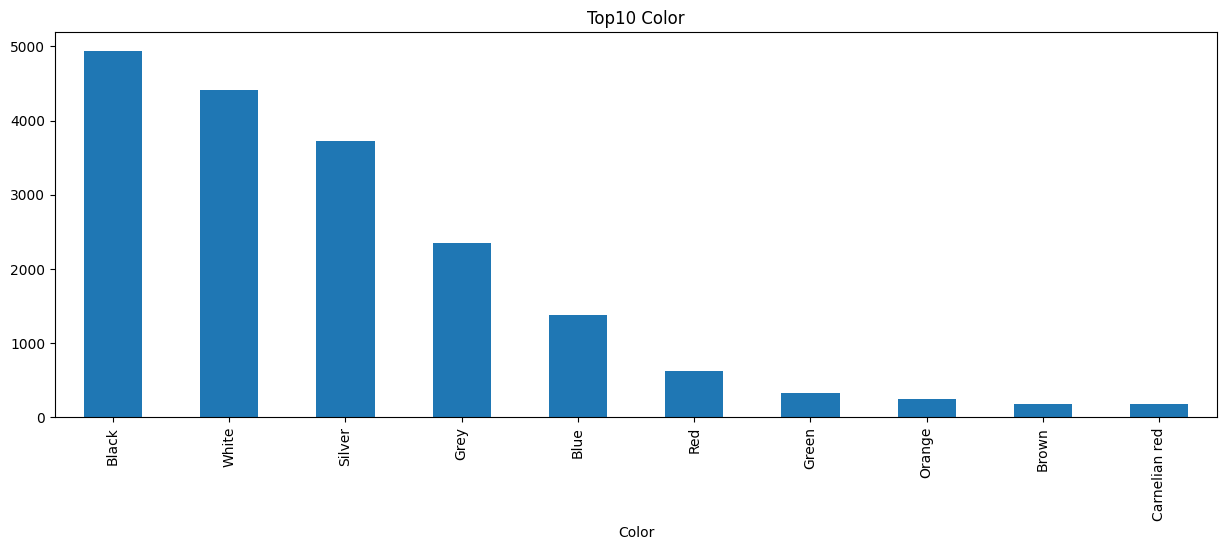

In [21]:
for col in data_obj:
    plt.figure(figsize=(15,5))
    top10=data[col].value_counts()[:10]
    
    top10.plot(kind='bar')
    plt.title('Top10'+" "+col)
    plt.show()

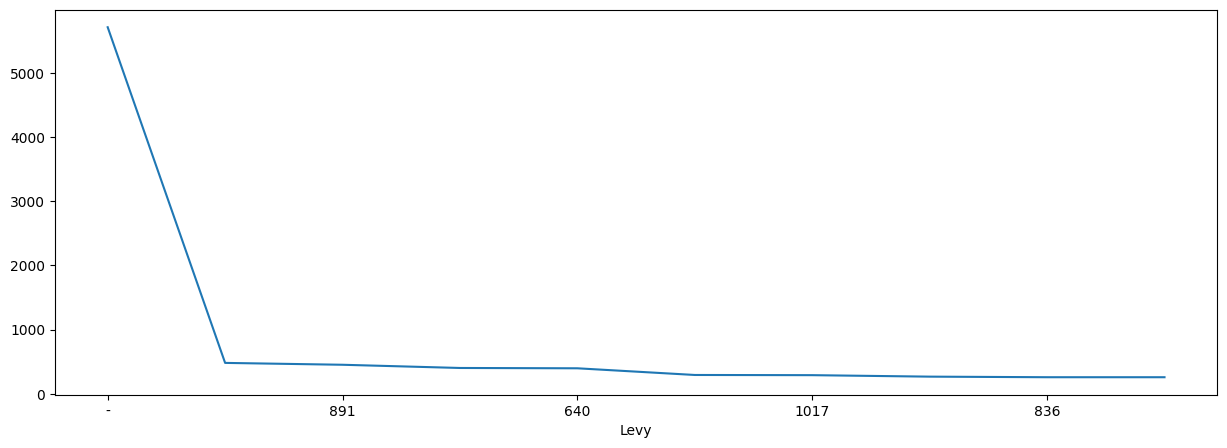

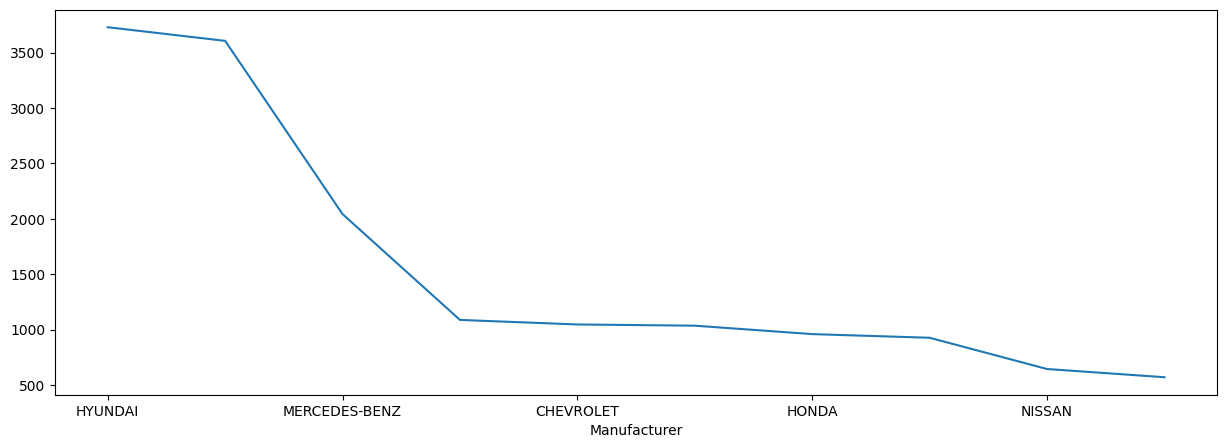

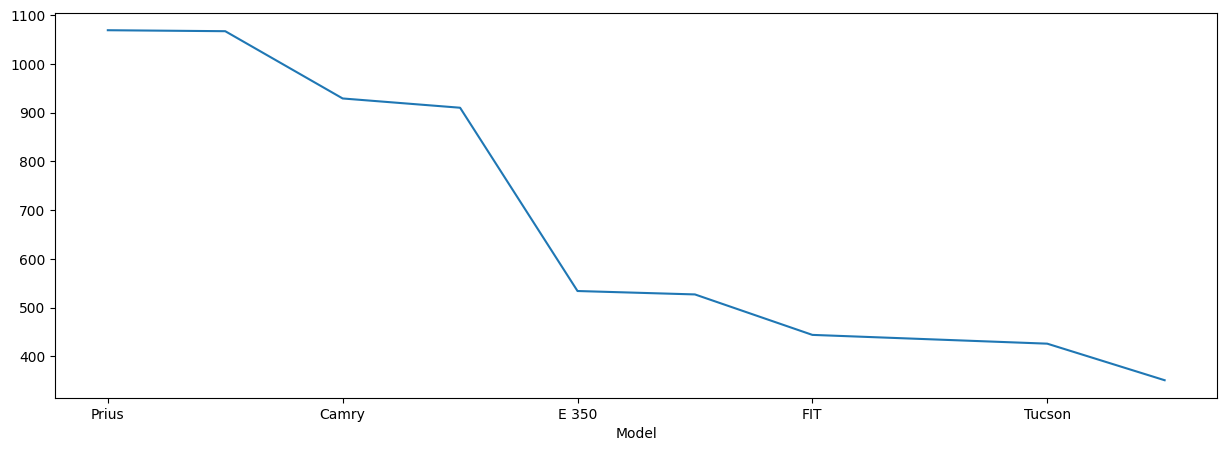

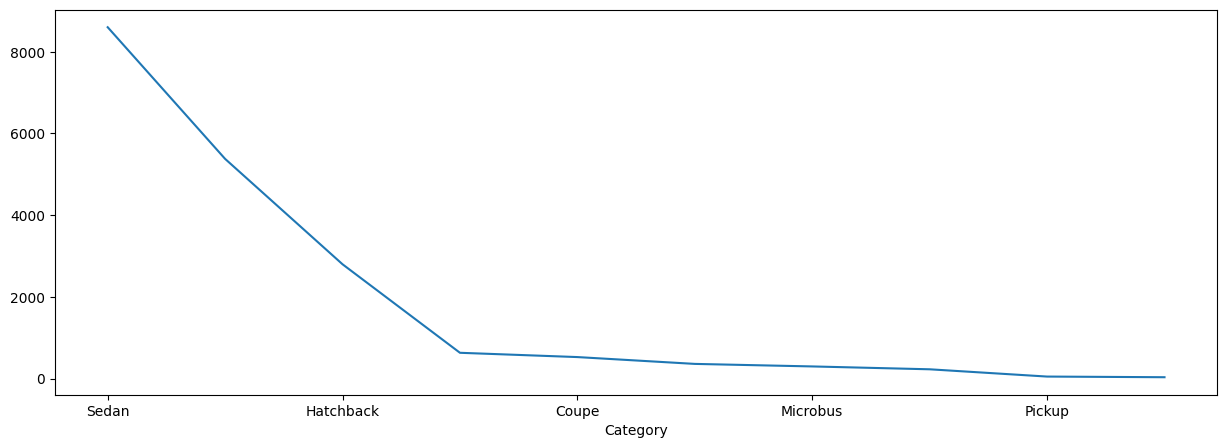

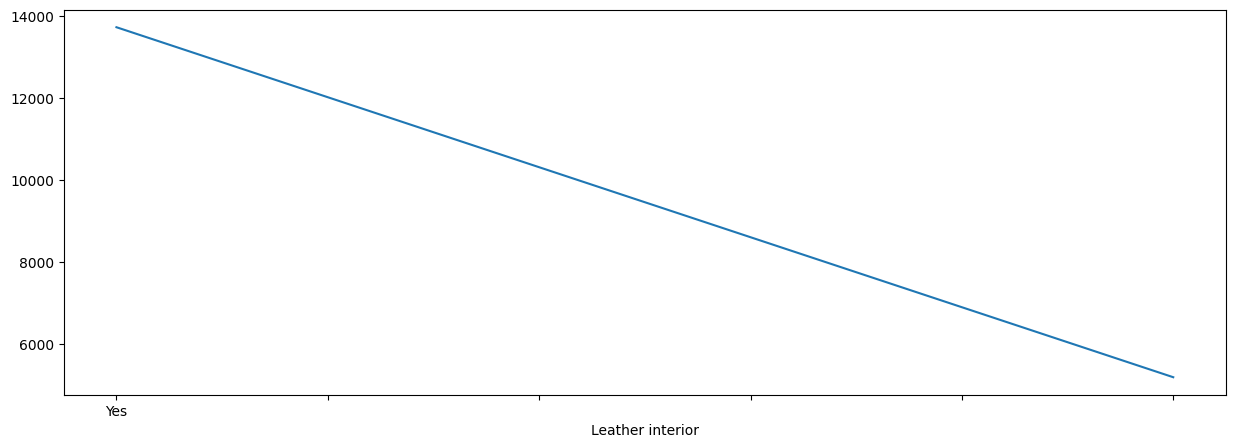

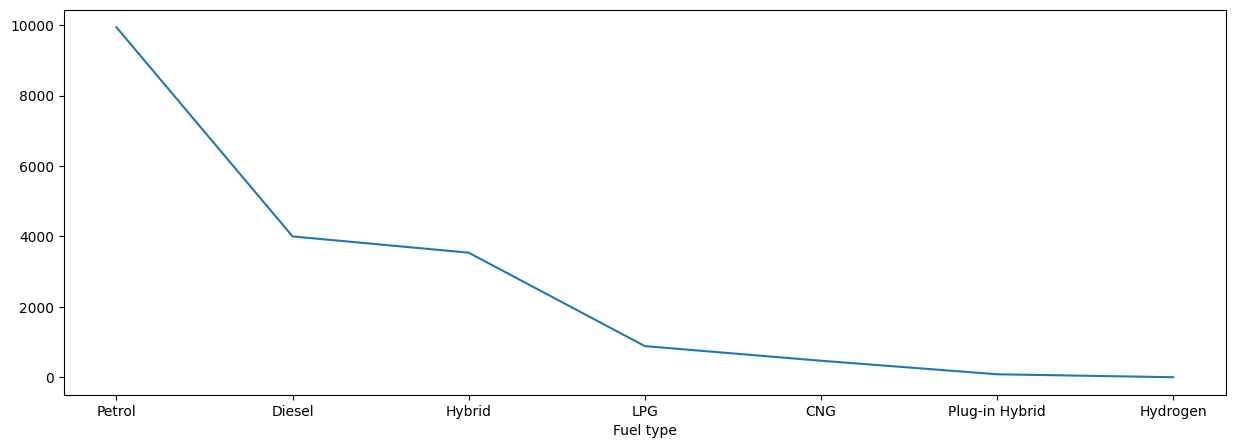

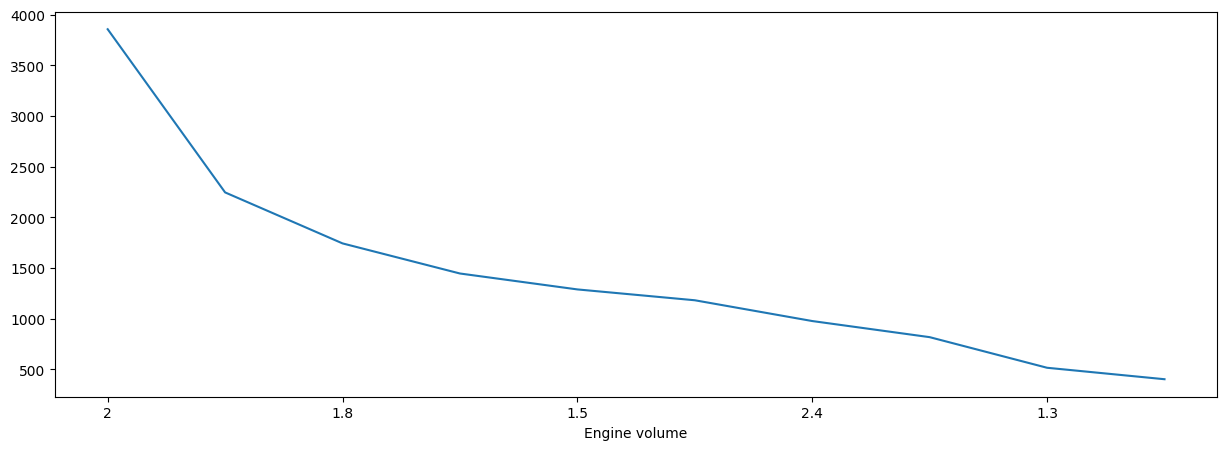

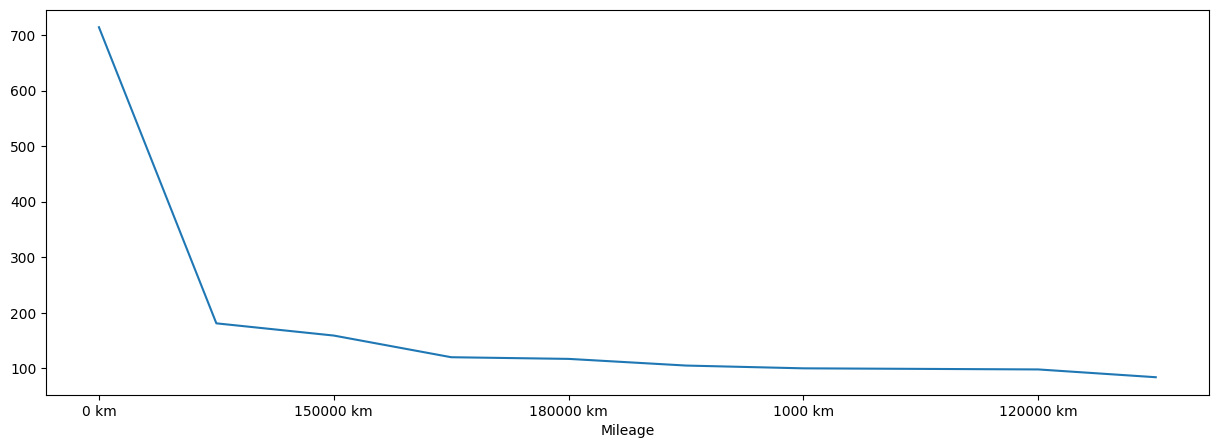

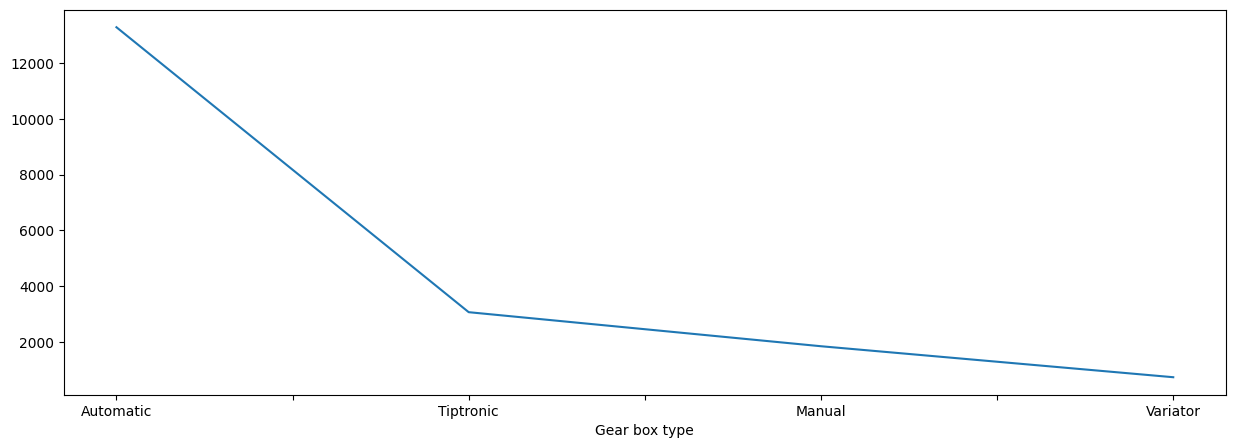

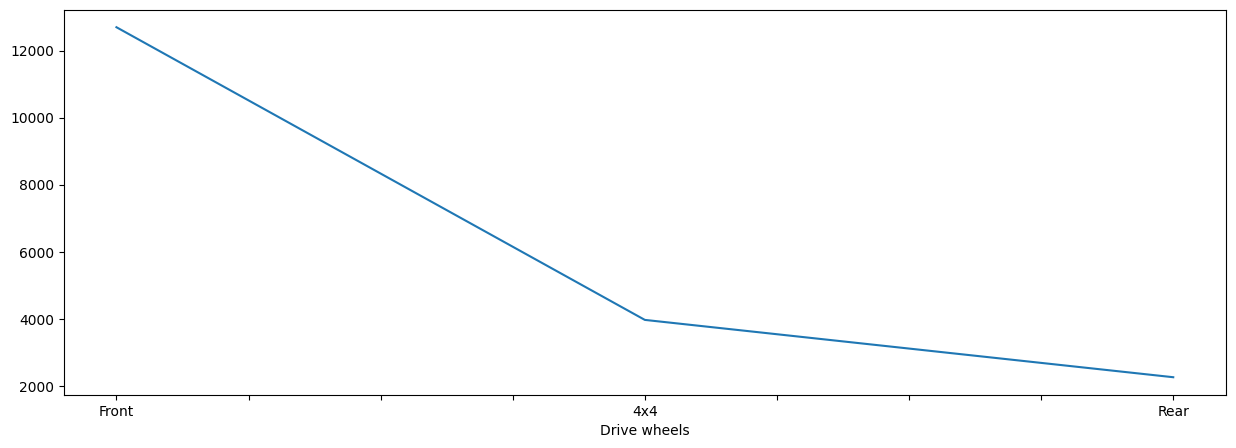

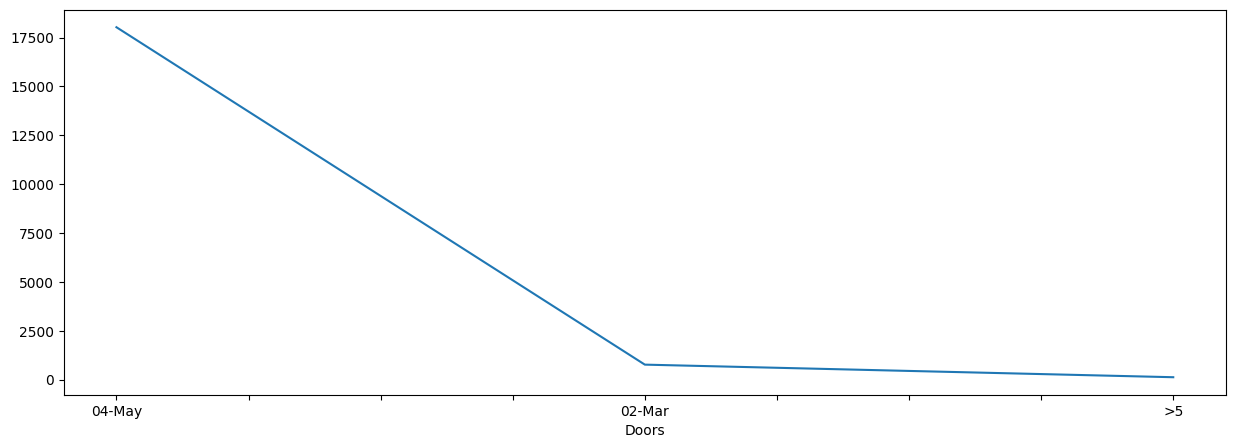

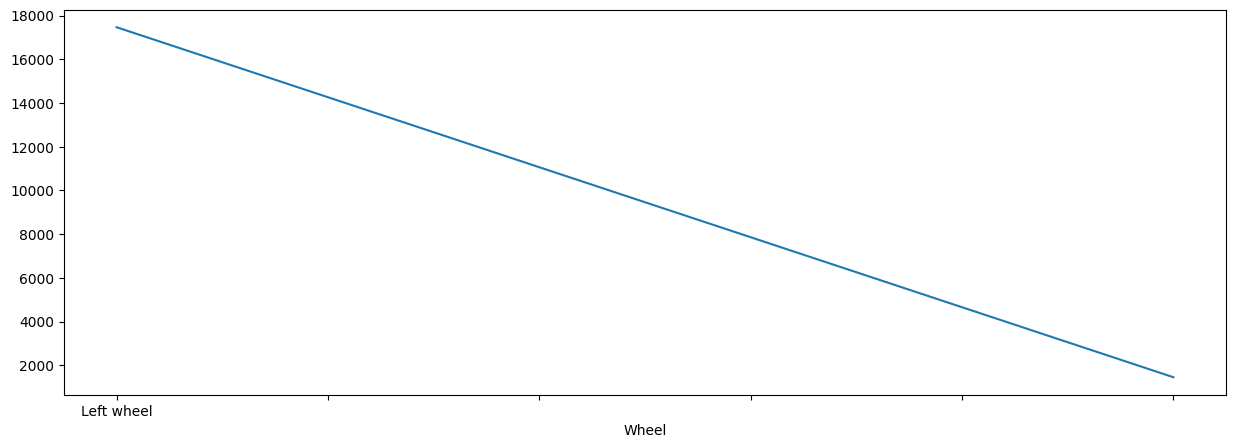

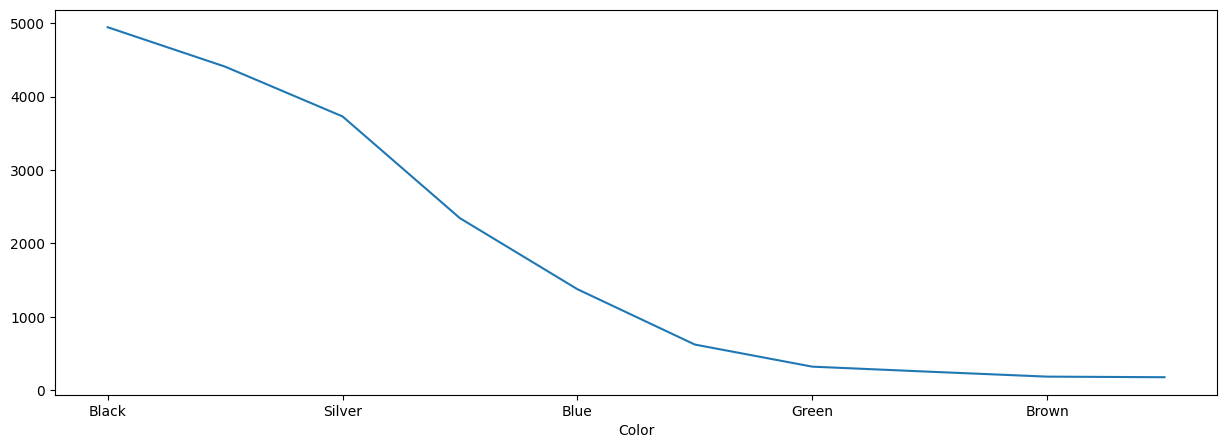

In [22]:
for col in data_obj:
    plt.figure(figsize=(15,5))
    top10=data[col].value_counts()[:10]
    top10.plot()

## Data Preprocessing

In [23]:
data.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [24]:
data['Doors'].nunique()

3

In [25]:
data.drop(['ID','Doors'],axis=1,inplace=True)
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4


In [26]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4


##  Date

In [27]:
# الجزء دا في الاخر ممكن اشيله 
import datetime
time=datetime.datetime.now()

In [28]:
data['Age']=time.year-data['Prod. year']

In [29]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,11


In [30]:
data=data.drop('Prod. year',axis=1)

## Levy

In [31]:
data['Levy']

0        1399
1        1018
2           -
3         862
4         446
         ... 
19232       -
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18924, dtype: object

In [32]:
data.Levy.replace({'-':'0'},inplace=True)
data['Levy']=data['Levy'].astype(int)

In [33]:
data['Levy']

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18924, dtype: int64

In [34]:
data['Levy'].dtype

dtype('int64')

## Mileage

In [35]:
data['Mileage']=data['Mileage'].str.replace('km','').astype('int')

In [36]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,11


## Engine volume

In [37]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [38]:
data['Is_Turbo']=data['Engine volume'].str.contains('Turbo',na=False).astype(int)

In [39]:
data['Engine volume']=data['Engine volume'].str.replace('Turbo','',regex=False)

In [40]:
data['Engine volume']=data['Engine volume'].astype(float)

In [41]:
data

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age,Is_Turbo
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,15,0
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,14,0
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,19,0
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,14,0
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,Left wheel,Silver,5,26,1
19233,15681,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,Left wheel,Red,8,14,0
19234,26108,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,Left wheel,Grey,4,15,0
19235,5331,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,Left wheel,Black,4,18,0


In [42]:
data['Is_Turbo'].value_counts()

Is_Turbo
0    17032
1     1892
Name: count, dtype: int64

In [43]:
data['Engine volume'].dtype

dtype('float64')

## outliers 

In [44]:
data_numeric = data.select_dtypes(include='number')

for col in data_numeric:
    q1 = data_numeric[col].quantile(.25)
    q3 = data_numeric[col].quantile(.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr

    outlier = ((data_numeric[col] > high) | (data_numeric[col] < low)).sum()
    total = data_numeric[col].shape[0]

    percent = round(100 * outlier / total, 2)
    print(f"Total Outliers in {col}: {outlier} ({percent}%)")
    if outlier>0:
        data=data.loc[(data[col]<=high) & (data[col] >=low)]

Total Outliers in Price: 1055 (5.57%)
Total Outliers in Levy: 160 (0.85%)
Total Outliers in Engine volume: 1358 (7.18%)
Total Outliers in Mileage: 635 (3.36%)
Total Outliers in Cylinders: 4765 (25.18%)
Total Outliers in Airbags: 0 (0.0%)
Total Outliers in Age: 962 (5.08%)
Total Outliers in Is_Turbo: 1892 (10.0%)


## categorical Data

In [45]:
dobject=data.select_dtypes(include='O')
dnumeric=data.select_dtypes(include='number')

In [46]:
dobject

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver
5,HYUNDAI,Santa FE,Jeep,Yes,Diesel,Automatic,Front,Left wheel,White
6,TOYOTA,Prius,Hatchback,Yes,Hybrid,Automatic,Front,Left wheel,White
...,...,...,...,...,...,...,...,...,...
19230,TOYOTA,Prius,Hatchback,Yes,Hybrid,Automatic,Front,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Black


In [47]:
for col in dobject:
    print(col)
    print(dobject[col].nunique())

Manufacturer
49
Model
721
Category
10
Leather interior
2
Fuel type
6
Gear box type
4
Drive wheels
3
Wheel
2
Color
16


In [48]:
from sklearn.preprocessing import OneHotEncoder
onehot_cols = ['Fuel type', 'Gear box type', 'Drive wheels']
ohe=OneHotEncoder(drop='first',sparse_output=False)
ohe_arr=ohe.fit_transform(data[onehot_cols])

In [49]:
import pandas as pd

ohe_df = pd.DataFrame(
    ohe_arr,
    columns=ohe.get_feature_names_out(onehot_cols),
    index=data.index
)


In [50]:
data = pd.concat([data.drop(columns=onehot_cols), ohe_df], axis=1)


In [51]:
print(data.shape)


(11148, 24)


In [52]:
data['Leather interior']=data['Leather interior'].map({'Yes':1,'No':0})
data['Wheel'] = data['Wheel'].map({'Left wheel': 0, 'Right-hand drive': 1})

In [53]:
from sklearn.preprocessing import LabelEncoder
label_cols=['Manufacturer', 'Model', 'Color', 'Category']
le=LabelEncoder()
for col in label_cols:
    data[col]=le.fit_transform(data[col])

In [54]:
data

,Price,Levy,Manufacturer,Model,Category,Leather interior,Engine volume,Mileage,Cylinders,Wheel,...,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
2,8467,0,16,298,3,0,1.3,200000,4.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3607,862,13,287,4,1,2.5,168966,4.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11726,446,16,298,3,1,1.3,91901,4.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,39493,891,17,585,4,1,2.0,160931,4.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1803,761,43,521,3,1,1.8,258909,4.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645,43,521,3,1,1.8,307325,4.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19233,15681,831,17,598,8,1,2.4,161600,4.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
19234,26108,836,17,654,4,1,2.0,116365,4.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19235,5331,1288,6,190,4,1,2.0,51258,4.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
data.Manufacturer.unique()

array([16, 13, 17, 43, 27, 31,  6, 41,  9, 21, 30, 40, 26, 15, 12, 46,  1,
       42, 24, 32, 35,  2,  3,  8, 29, 20, 11,  0, 45, 19, 39,  7, 25,  4,
       10, 33, 23, 18,  5, 37, 48, 38, 34, 22, 28, 47, 44, 14, 36])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11148 entries, 2 to 19236
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     11148 non-null  int64  
 1   Levy                      11148 non-null  int64  
 2   Manufacturer              11148 non-null  int64  
 3   Model                     11148 non-null  int64  
 4   Category                  11148 non-null  int64  
 5   Leather interior          11148 non-null  int64  
 6   Engine volume             11148 non-null  float64
 7   Mileage                   11148 non-null  int64  
 8   Cylinders                 11148 non-null  float64
 9   Wheel                     11148 non-null  int64  
 10  Color                     11148 non-null  int64  
 11  Airbags                   11148 non-null  int64  
 12  Age                       11148 non-null  int64  
 13  Is_Turbo                  11148 non-null  int64  
 14  Fuel type_D

## model

In [57]:
data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather interior', 'Engine volume', 'Mileage', 'Cylinders', 'Wheel',
       'Color', 'Airbags', 'Age', 'Is_Turbo', 'Fuel type_Diesel',
       'Fuel type_Hybrid', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear'],
      dtype='object')

In [58]:
data['Price'].value_counts()

Price
15681    165
392      162
470      158
14113    146
18817    139
        ... 
28523      1
17042      1
18779      1
8300       1
22075      1
Name: count, Length: 1690, dtype: int64

In [59]:
data = data[data['Price'] >= 1000]


In [60]:
data['Price'].value_counts()

Price
15681    165
14113    146
18817    139
12544    134
10976    122
        ... 
34127      1
23339      1
26701      1
11666      1
18948      1
Name: count, Length: 1635, dtype: int64

In [61]:
x=data.drop('Price',axis=1)
y=data['Price']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [65]:
Algorthimes=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','SVR',]
R2=[]
Rmse=[]

In [66]:
def models(model):
    model.fit(x_train, y_train)                      
    pre = model.predict(x_test)                     
    r2 = r2_score(y_test, pre)                           
    rmse = np.sqrt(mean_squared_error(y_test, pre))  
    R2.append(r2)
    Rmse.append(rmse)
    score = model.score(x_test, y_test)                   
    print(f"The Score of Model is : {score}")


In [67]:
def models(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test, pre)
    rmse = np.sqrt(mean_squared_error(y_test, pre))
    R2.append(r2)
    Rmse.append(rmse)


In [68]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=GradientBoostingRegressor()
model5=SVR()

In [69]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)

In [70]:
df=pd.DataFrame({'ALgorighmes':Algorthimes,'R2_score':R2,'Rmse':Rmse})
df

,ALgorighmes,R2_score,Rmse
0,LinearRegression,0.411322,8082.166906
1,DecisionTreeRegressor,0.659085,6150.518759
2,RandomForestRegressor,0.818552,4487.094596
3,GradientBoostingRegressor,0.698992,5779.334206
4,SVR,-0.019366,10635.404821


In [71]:
print(len(Algorthimes), len(R2), len(Rmse))

5 5 5


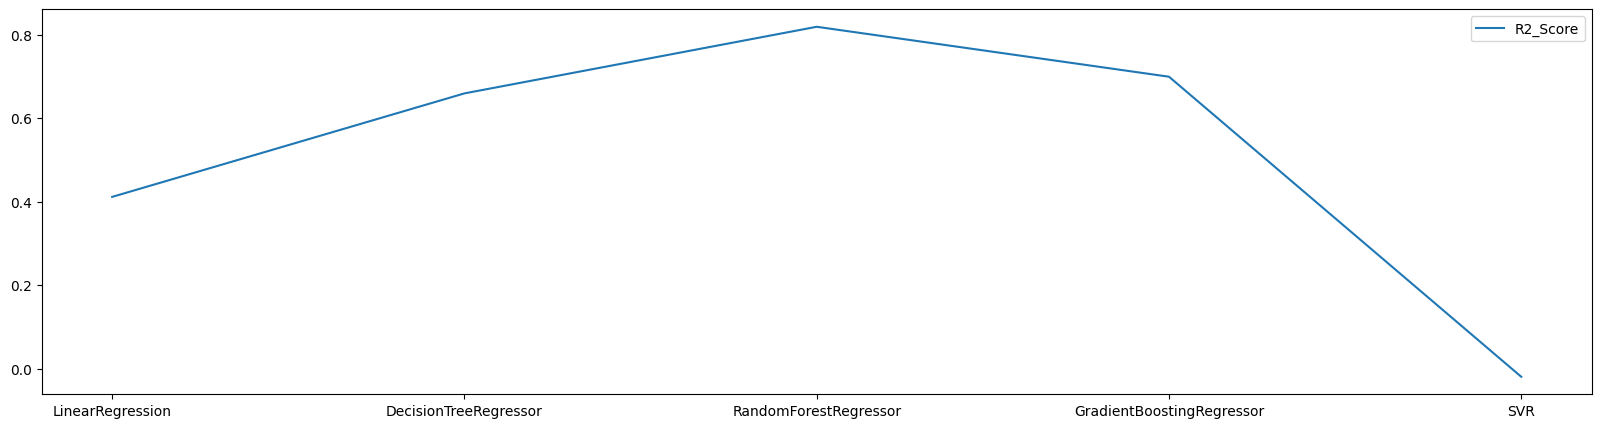

In [72]:
plt.figure(figsize=(20,5))
plt.plot(df.ALgorighmes,df.R2_score,label='R2_Score')
plt.legend()
plt.show()

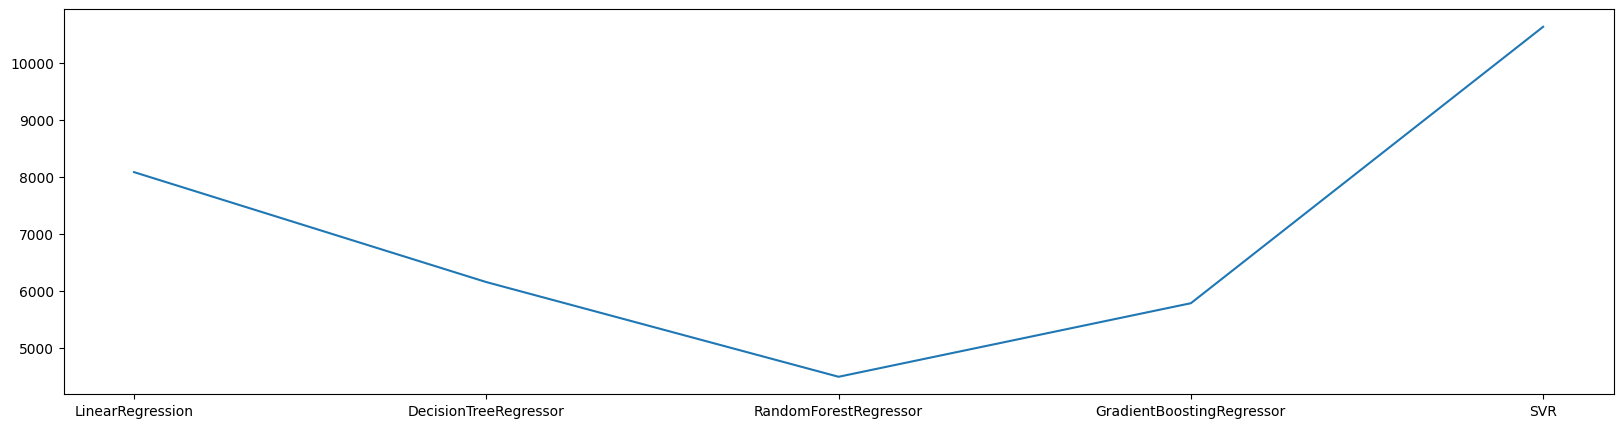

In [73]:
plt.figure(figsize=(20,5))
plt.plot(df.ALgorighmes,df.Rmse)

## pickle

In [74]:
# import pickle

In [75]:
# fille_name='Cars_prediction.sav'

In [76]:
# pickle.dump(model3,open(fille_name,'wb'))

In [77]:
# import os
# print(os.getcwd())


In [78]:
data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather interior', 'Engine volume', 'Mileage', 'Cylinders', 'Wheel',
       'Color', 'Airbags', 'Age', 'Is_Turbo', 'Fuel type_Diesel',
       'Fuel type_Hybrid', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear'],
      dtype='object')

In [79]:
data['Manufacturer'].unique()

array([16, 13, 17, 43, 27, 31,  6,  9, 21, 30, 40, 15, 12, 46,  1, 42, 24,
       32, 26, 41, 35,  2,  3,  8, 29, 20, 11,  0, 45, 19, 39,  7, 25,  4,
       10, 33, 23, 18,  5, 37, 48, 38, 34, 22, 28, 47, 44, 36, 14])

In [80]:
data['Category'].unique()

array([3, 4, 8, 9, 1, 6, 5, 2, 7, 0])

In [81]:
data['Model'].unique()

array([298, 287, 585, 521, 267, 171, 371, 598, 527,  80, 289, 203, 118,
       413, 659,  55, 654, 681, 190, 709, 239, 491, 426, 358, 327, 514,
        76, 421, 343, 589, 553, 258, 630, 383,  35, 406, 281,  56, 561,
       194, 683, 661, 233, 296, 385,   6, 368, 151, 667, 558, 594, 101,
        93, 404, 508, 220, 574, 443, 354, 591, 639, 129,  73, 646, 578,
       555, 714, 120, 141, 261, 332, 100, 441, 208, 495, 176, 444, 397,
       627,  79, 207, 130, 559, 411, 106,  85, 592, 285, 657,  63, 419,
        29, 282, 135, 696, 562, 121,  90, 224, 147, 322, 211,  62, 551,
       484, 423, 398, 325, 454, 457, 618, 448, 375, 609, 277,  99, 485,
       265, 685, 582,  44, 402, 232, 221, 575,  65, 550,  68, 369,  27,
       382, 161, 361,  71, 214, 647, 705,  86, 466, 540, 506,   2, 263,
        26, 619, 673, 317, 193, 625, 245, 631, 717, 388, 390, 496, 405,
        14, 704, 184, 422, 483, 458, 391, 641, 588, 340, 597,  58, 226,
        33, 648, 615, 279, 175, 316, 403, 472, 164, 606, 109, 20

In [84]:
data['Model'].unique()

array([298, 287, 585, 521, 267, 171, 371, 598, 527,  80, 289, 203, 118,
       413, 659,  55, 654, 681, 190, 709, 239, 491, 426, 358, 327, 514,
        76, 421, 343, 589, 553, 258, 630, 383,  35, 406, 281,  56, 561,
       194, 683, 661, 233, 296, 385,   6, 368, 151, 667, 558, 594, 101,
        93, 404, 508, 220, 574, 443, 354, 591, 639, 129,  73, 646, 578,
       555, 714, 120, 141, 261, 332, 100, 441, 208, 495, 176, 444, 397,
       627,  79, 207, 130, 559, 411, 106,  85, 592, 285, 657,  63, 419,
        29, 282, 135, 696, 562, 121,  90, 224, 147, 322, 211,  62, 551,
       484, 423, 398, 325, 454, 457, 618, 448, 375, 609, 277,  99, 485,
       265, 685, 582,  44, 402, 232, 221, 575,  65, 550,  68, 369,  27,
       382, 161, 361,  71, 214, 647, 705,  86, 466, 540, 506,   2, 263,
        26, 619, 673, 317, 193, 625, 245, 631, 717, 388, 390, 496, 405,
        14, 704, 184, 422, 483, 458, 391, 641, 588, 340, 597,  58, 226,
        33, 648, 615, 279, 175, 316, 403, 472, 164, 606, 109, 20

In [86]:
data['Category'].unique()

array([3, 4, 8, 9, 1, 6, 5, 2, 7, 0])

In [93]:
data

,Price,Levy,Manufacturer,Model,Category,Leather interior,Engine volume,Mileage,Cylinders,Wheel,...,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
2,8467,0,16,298,3,0,1.3,200000,4.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3607,862,13,287,4,1,2.5,168966,4.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11726,446,16,298,3,1,1.3,91901,4.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,39493,891,17,585,4,1,2.0,160931,4.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1803,761,43,521,3,1,1.8,258909,4.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,8781,0,11,166,3,0,2.4,0,4.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19224,19130,0,21,488,8,1,2.4,35800,4.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19233,15681,831,17,598,8,1,2.4,161600,4.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
19234,26108,836,17,654,4,1,2.0,116365,4.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
data['Engine volume'].unique()

array([1.3, 2.5, 2. , 1.8, 1.6, 2.4, 1.5, 2.3, 2.2, 1.4, 1.2, 1.7, 2.9,
       1.9, 3.5, 2.1, 1. , 0.8, 2.7, 3. , 3.2, 1.1, 3.3, 2.8])

In [97]:
data['Mileage'].unique()

array([200000, 168966,  91901, ...,  23430, 132700, 140607], shape=(4948,))

In [102]:
data['Cylinders'].unique()

array([4.])

In [107]:
data['Airbags'].unique()

array([ 2,  0,  4, 12,  8,  6,  3, 10, 16,  7,  9,  5, 11, 14,  1, 13])